### Jak zapisywać modele, by wytrenować je raz, a potem na produkcji tylko ładować?

Skorzystamy z biblioteki joblib.

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris

iris_data = load_iris()
X, y = iris_data.data, iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = SVC(C=0.1, kernel='linear', max_iter=1000)
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', max_iter=1000)

In [2]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.9487179487179488

In [3]:
import joblib

model_filename = "model_svc.pkl"
joblib.dump(model, model_filename)

['model_svc.pkl']

In [4]:
model

SVC(C=0.1, kernel='linear', max_iter=1000)

In [9]:
model_filename = "model_svc.pkl"
model = joblib.load(model_filename)

In [10]:
model

SVC(C=0.1, kernel='linear', max_iter=1000)

**Ciekawostka:** [Jak zrobić TO (tj. dumpować model) przy użyciu biblioteki pickle](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

### Jak radzić sobie z wartościami kategorycznymi?

In [5]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [20]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


In [21]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Stwórzmy sobie najpierw zmienne typowo kategoryczne:

In [22]:
X['Moc'] = pd.cut(X['Alcohol'], 3, labels=['słabe', 'średnie', 'mocne'], duplicates='drop')
X['Kolor'] = pd.cut(X['Color intensity'], 3, labels=['białe', 'różowe', 'czerwone'], duplicates='drop')
X['Kwas jabłkowy'] = pd.cut(X['Malic acid'], 2, labels=['tak', 'nie'], duplicates='drop')

In [23]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc,Kolor,Kwas jabłkowy
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,mocne,różowe,tak
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,średnie,białe,tak
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,średnie,różowe,tak
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,mocne,różowe,tak
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,średnie,białe,tak


A następnie wszystkie cechy zamieńmy na one hot vectors

In [24]:
X = pd.get_dummies(X, columns=['Moc', 'Kolor', 'Kwas jabłkowy'], drop_first=True)

In [13]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc_średnie,Moc_mocne,Kolor_różowe,Kolor_czerwone,Kwas jabłkowy_nie
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0,0,0


Możemy to też zrobić przy użyciu OneHotEncodera ze sklearna:

In [26]:
wine, wine_classes = load_dataset('wine', 'Class')

y = wine.pop('class')
X = wine

X['Moc'] = pd.cut(X['Alcohol'], 3, labels=['słabe', 'średnie', 'mocne'], duplicates='drop')
X['Kolor'] = pd.cut(X['Color intensity'], 3, labels=['białe', 'różowe', 'czerwone'], duplicates='drop')
X['Kwas jabłkowy'] = pd.cut(X['Malic acid'], 2, labels=['tak', 'nie'], duplicates='drop')

In [27]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output = False)
# zwraca macierz
X_onehot = one_hot_encoder.fit_transform(X[['Moc', 'Kolor', 'Kwas jabłkowy']])
# przypisanie do df
X_onehot_df = pd.DataFrame(X_onehot, 
                           columns=one_hot_encoder.get_feature_names_out(['Moc', 'Kolor', 'Kwas jabłkowy']))

Target encoding:

In [28]:
df = pd.concat([X,y], axis = 1)

means = df.groupby('Moc')['class'].mean()
# po średniej ze zgrupowanych "moc po klasach"
# może wystąpić wyciek, leak ze wzgledu na wziecie pod uwagę wartosci klass z Y
df['Moc'] = df['Moc'].map(means)

display(df)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc,Kolor,Kwas jabłkowy,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.294118,różowe,tak,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.116279,białe,tak,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.116279,różowe,tak,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.294118,różowe,tak,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.116279,białe,tak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0.294118,różowe,nie,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1.116279,różowe,nie,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1.116279,czerwone,nie,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1.116279,czerwone,tak,1


### Jak radzić sobie z niezbalansowanym zbiorem?

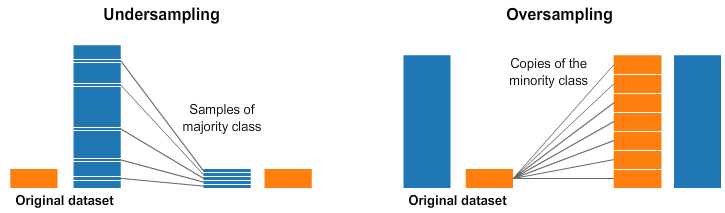

Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

Stwórzmy syntetyczny niezbalansowany zbiór:

In [29]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20,  weights=[0.8, 0.2], random_state=42)
df = pd.DataFrame(X, columns=[f"feat_{i}" for i in range(20)])
df['class'] = y

In [30]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,class
0,-0.669356,-0.198069,-0.870766,1.141831,0.021606,-1.086403,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.646000,1.634606,-0.938180,-1.267337,0.261736,1.016643,0
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.572040,0.698816,0.436236,-0.315082,-0.471095,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-0.893229,-0.929136,-0.221600,-0.346772,0.425658,-1.040199,0
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0


In [31]:
df['class'].value_counts()

0    798
1    202
Name: class, dtype: int64

Wytrenujmy na tym model SVM

In [34]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X = df[[f"feat_{i}" for i in range(20)]]
y = df['class']

In [36]:
X = df[[f"feat_{i}" for i in range(20)]]
y = df['class']

X_rest, X_final, y_rest, y_final = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Metoda extend() w Pythonie jest używana do dodawania elementów z listy (lub dowolnego iterowalnego) do innej listy. Różnica między extend() a append() polega na tym, że extend() dodaje elementy z listy jako pojedyncze elementy, podczas gdy append() dodaje całą listę jako jeden element.

In [37]:
true, predicted = [], []

for train_index, test_index in StratifiedKFold(5).split(X_rest, y_rest):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_svm = SVC()
    model_svm.fit(X_train, y_train)
    true.extend(y_test)
    predicted.extend(model_svm.predict(X_test))

print(classification_report(true, predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       636
           1       0.85      0.71      0.77       164

    accuracy                           0.91       800
   macro avg       0.89      0.84      0.86       800
weighted avg       0.91      0.91      0.91       800



In [38]:
model_svm = SVC()
model_svm.fit(X_rest, y_rest)
y_pred = model_svm.predict(X_final)
print(classification_report(y_final, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.82      0.78      0.79        40

    accuracy                           0.92       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.92      0.92      0.92       200



<Axes: >

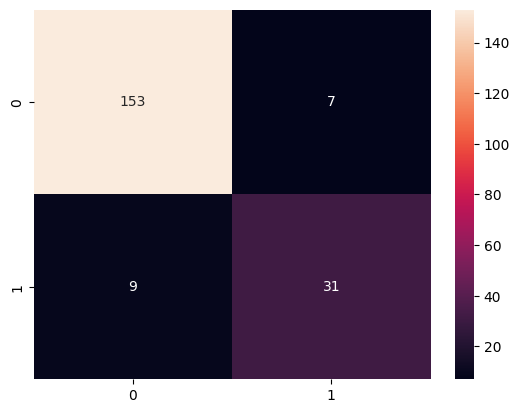

In [39]:
import seaborn as sns
cm = confusion_matrix(y_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#### Oversampling

In [40]:
# modyfikujemy tylko zbiór treningowy
# testujemy na wartościach właściwych bez zmiany

In [41]:
from sklearn.utils import resample

In [42]:
df = pd.DataFrame(X_rest, columns=[f"feat_{i}" for i in range(20)])
df['class'] = y_rest

In [43]:
df['class'].value_counts()

0    638
1    162
Name: class, dtype: int64

In [45]:
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=638,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['class'].value_counts()

0    638
1    638
Name: class, dtype: int64

In [46]:
df.merge(df_upsampled[df_upsampled['class'] == 1].drop_duplicates(), on = list(df.columns[:-1]), how = 'right')

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,class_x,class_y
0,-0.234508,0.163804,0.227405,-1.034598,-0.960780,0.157920,-0.889845,0.391881,0.501129,-0.784321,...,0.425911,0.650668,-0.569031,-1.070666,1.589147,0.688496,0.026012,0.867805,1,1
1,-1.228945,-0.612212,-0.717499,0.106435,-0.107127,0.733345,-0.965575,-0.182315,0.596794,0.720357,...,0.936806,1.268359,0.710796,1.219943,0.149872,0.332613,-0.530584,0.707106,1,1
2,-0.818525,-1.015682,0.751091,1.312549,-0.152377,1.153597,0.041386,0.196272,0.526548,0.328767,...,0.623600,0.344134,1.246686,1.583718,2.022213,-0.122655,-0.859614,0.586453,1,1
3,1.676455,-0.078133,1.587401,1.071476,0.165859,0.494788,0.399997,-0.457677,-0.600887,0.203944,...,0.323247,-1.109750,-0.338478,-1.547570,-1.564974,0.192990,-0.199075,-0.302097,1,1
4,0.336500,-0.549477,-0.307048,-2.521605,0.106494,3.547011,1.143566,0.197676,0.407090,0.891701,...,0.391829,0.428353,-2.452455,0.020121,-1.566959,-0.672394,-1.422074,-0.462737,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.482534,-0.429443,0.444968,-0.331865,-0.161767,1.714153,0.031063,0.609239,0.747546,0.168231,...,0.479940,0.324782,-0.784869,-1.007195,0.660343,-2.161304,-0.765005,1.396760,1,1
154,0.037647,0.448819,0.404049,0.885527,-0.852768,-0.472745,1.798415,-1.542193,1.608077,-0.685473,...,0.283678,0.463270,-0.590499,0.426790,1.161211,-1.005695,0.367734,0.521004,1,1
155,0.063702,0.708144,-0.097311,1.496880,-0.692065,1.193560,-0.298153,-0.076239,-0.292758,0.374062,...,-0.240724,-0.611085,-3.006486,-1.701140,-0.216827,0.264482,-0.054811,2.004423,1,1
156,1.590835,-1.068700,1.318608,0.532596,-0.784112,1.170129,-1.117894,-1.521433,-0.408500,0.160259,...,1.789791,-0.547218,1.358496,0.296185,0.358554,-0.369244,-0.890183,1.031043,1,1


In [47]:
df['class'].value_counts()

0    638
1    162
Name: class, dtype: int64

In [48]:
df_upsampled['class'].value_counts()

0    638
1    638
Name: class, dtype: int64

Sprawdźmy, czy nasz model na takim zbiorze zwróci lepsze rezultaty

In [50]:
X = df_upsampled[[f"feat_{i}" for i in range(20)]]
y = df_upsampled['class']

true, predicted = [], []

for train_index, test_index in StratifiedKFold(5).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_svm = SVC()
    model_svm.fit(X_train, y_train)
    true.extend(y_test)
    predicted.extend(model_svm.predict(X_test))

print(classification_report(true, predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       638
           1       0.93      0.95      0.94       638

    accuracy                           0.94      1276
   macro avg       0.94      0.94      0.94      1276
weighted avg       0.94      0.94      0.94      1276



In [51]:
model_svm = SVC()
model_svm.fit(X, y)
y_pred = model_svm.predict(X_final)
print(classification_report(y_final, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       160
           1       0.71      0.88      0.79        40

    accuracy                           0.91       200
   macro avg       0.84      0.89      0.86       200
weighted avg       0.92      0.91      0.91       200



<Axes: >

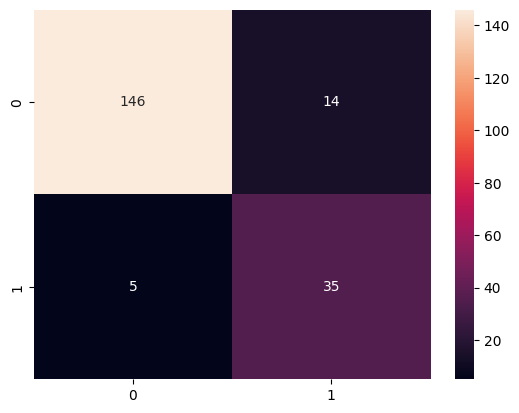

In [52]:
cm = confusion_matrix(y_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#### Undersampling

In [53]:
df = pd.DataFrame(X_rest, columns=[f"feat_{i}" for i in range(20)])
df['class'] = y_rest

In [54]:
df['class'].value_counts()

0    638
1    162
Name: class, dtype: int64

In [55]:
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample with replacement
                                   n_samples=162,    # to match majority class
                                   random_state=42)  # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled['class'].value_counts()

1    162
0    162
Name: class, dtype: int64

Sprawdźmy, czy nasz model na takim zbiorze zwróci lepsze rezultaty

In [56]:
X = df_downsampled[[f"feat_{i}" for i in range(20)]]
y = df_downsampled['class']

true, predicted = [], []

for train_index, test_index in StratifiedKFold(5).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_svm = SVC()
    model_svm.fit(X_train, y_train)
    true.extend(y_test)
    predicted.extend(model_svm.predict(X_test))

print(classification_report(true, predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       162
           1       0.90      0.82      0.86       162

    accuracy                           0.87       324
   macro avg       0.87      0.87      0.87       324
weighted avg       0.87      0.87      0.87       324



In [57]:
model_svm = SVC()
model_svm.fit(X, y)
y_pred = model_svm.predict(X_final)
print(classification_report(y_final, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       160
           1       0.66      0.93      0.77        40

    accuracy                           0.89       200
   macro avg       0.82      0.90      0.85       200
weighted avg       0.92      0.89      0.90       200



<Axes: >

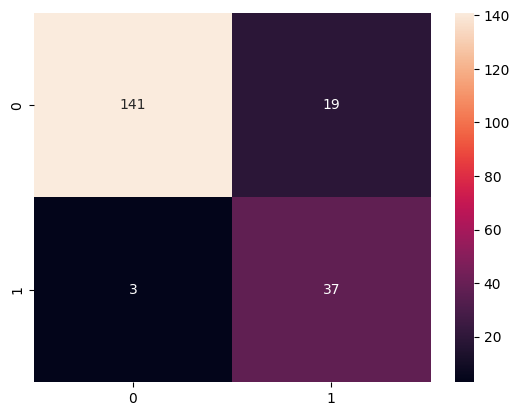

In [58]:
cm = confusion_matrix(y_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d')